In [1]:
# 必要な物を読み込む
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pitchpx.const import PitchPxConst
from collections import OrderedDict

In [2]:
# ノーヒットノーラン前後の岩隈の試合データを取得する

iwakuma_pitch_data= OrderedDict()
for day in (20150807, 20150812, 20150818):
    pitch= pd.read_csv('./data/mlbam_pitch_{day}.csv'.format(day=day))
    iwakuma_pitch_data[day] = pitch.query('pit_box_name=="Iwakuma"')


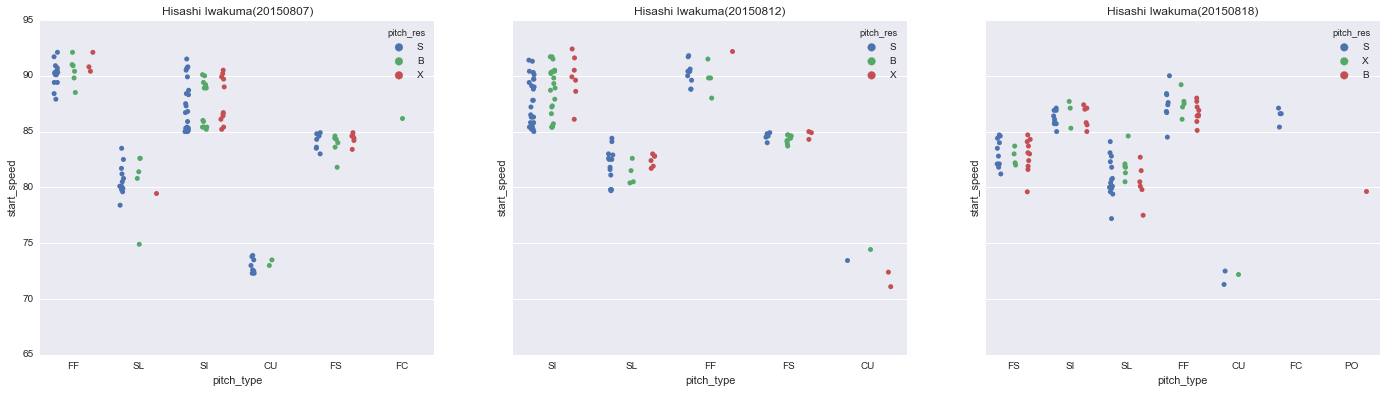

In [3]:
# X:球種, Y:球速(初速)毎に結果(S:Strike, B:Ball, X:Ball in play)を可視化
axarray = {day: None for day in iwakuma_pitch_data.keys()}
f, (axarray) = plt.subplots(1, len(iwakuma_pitch_data.keys()), sharey=True, figsize=(24,6))

for i, day in enumerate(iwakuma_pitch_data.keys()):
    axarray[i].set_title('Hisashi Iwakuma({day})'.format(day=day))
    sns.stripplot(x="pitch_type", y="start_speed", data=iwakuma_pitch_data[day], hue="pitch_res", ax=axarray[i], split=True, jitter=True)


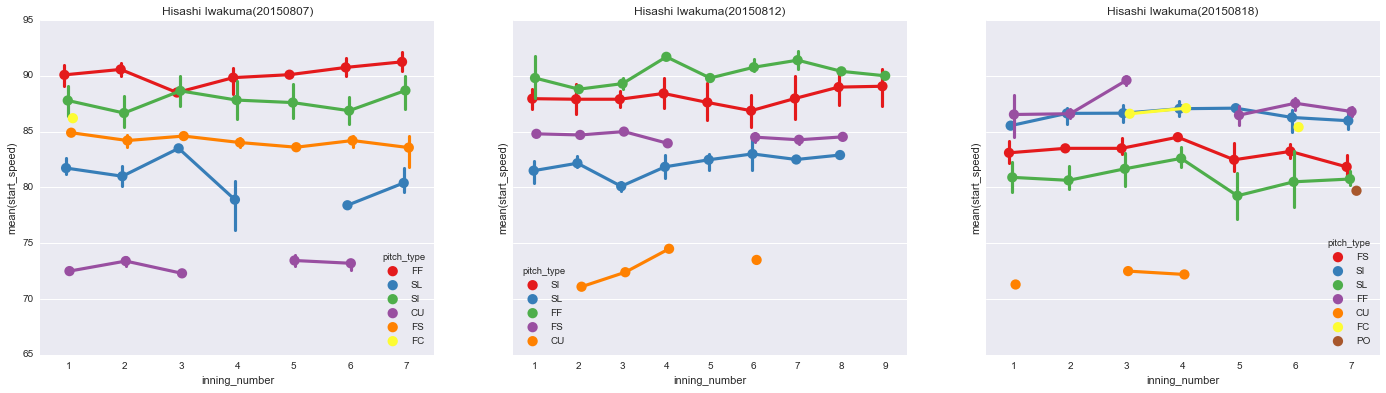

In [4]:
# イニング・球種ごとの初速平均を可視化
axarray = {day: None for day in iwakuma_pitch_data.keys()}
f, (axarray) = plt.subplots(1, len(iwakuma_pitch_data.keys()), sharey=True, figsize=(24,6))

for i, day in enumerate(iwakuma_pitch_data.keys()):
    axarray[i].set_title('Hisashi Iwakuma({day})'.format(day=day))
    sns.pointplot(x="inning_number", y="start_speed", hue="pitch_type", ax=axarray[i], data=iwakuma_pitch_data[day], dodge=True, palette="Set1")


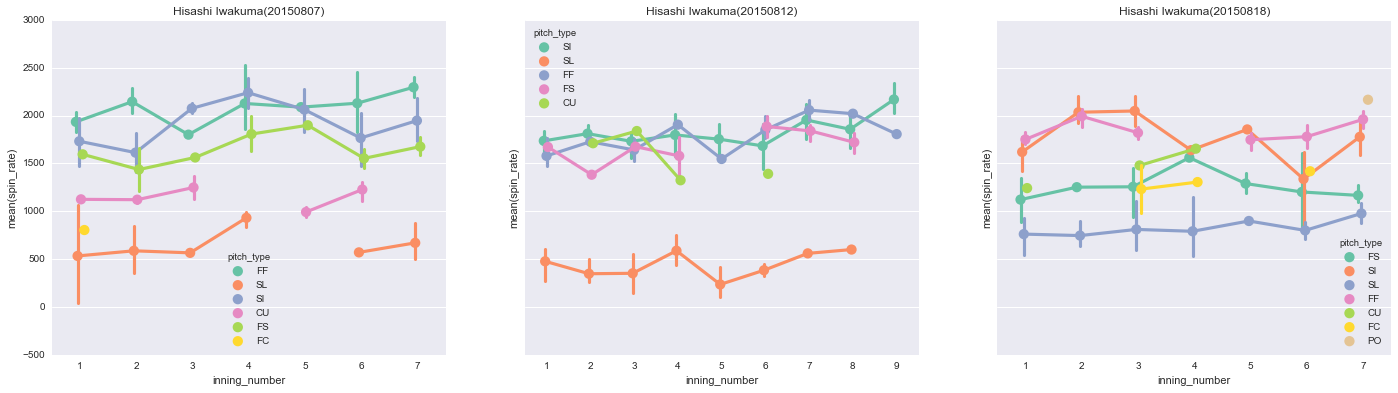

In [5]:
# イニング・球種毎のボール回転数(Spin Rate)
axarray = {day: None for day in iwakuma_pitch_data.keys()}
f, (axarray) = plt.subplots(1, len(iwakuma_pitch_data.keys()), sharey=True, figsize=(24,6))

for i, day in enumerate(iwakuma_pitch_data.keys()):
    axarray[i].set_title('Hisashi Iwakuma({day})'.format(day=day))
    sns.pointplot(x="inning_number", y="spin_rate", hue="pitch_type", ax=axarray[i], data=iwakuma_pitch_data[day], dodge=True, palette="Set2")


    

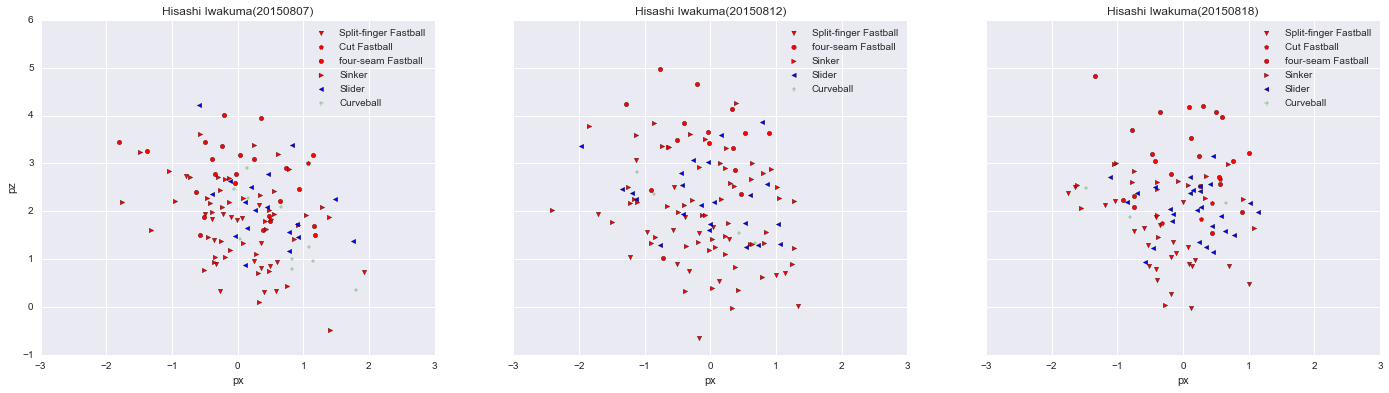

In [6]:
# イニング・球種毎のボール回転数(Spin Rate)
axarray = {day: None for day in iwakuma_pitch_data.keys()}
f, (axarray) = plt.subplots(1, len(iwakuma_pitch_data.keys()), sharey=True, figsize=(24,6))

for i, day in enumerate(iwakuma_pitch_data.keys()):
    axarray[i].set_title('Hisashi Iwakuma({day})'.format(day=day))
    datasets = iwakuma_pitch_data[day]
    for k, v in PitchPxConst.PITCH_TYPES.items():
        ds = datasets.query('pitch_type=="{type}"'.format(type=k))
        if ds.empty:
            continue
        ds.plot(
            kind='scatter', 
            x='px', 
            y='pz', 
            label=PitchPxConst.PITCH_TYPES[k], 
            color=PitchPxConst.PITCH_TYPES_COLORS[k], 
            marker=PitchPxConst.PITCH_TYPES_MARKERS[k], 
            xlim=(-3.0, 3.0), 
            ylim=(-1.0, 6.0), 
            ax=axarray[i]
        )
